## Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
train_data_path = "/content/drive/MyDrive/retinopathy-dataset"
validation_data_path = "/content/drive/MyDrive/retinopathy-dataset"

Load a dataset from the google drive.In data set there are three floder one is train set and another is test set.In all three floder there four sub floder is there. 1.diseased cotton leaf 2.diseased cotton plant 3.fresh cotton leaf 4.fresh cotton plant

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

training_data = train_datagen.flow_from_directory(train_data_path,
                                      target_size=(150, 150),
                                      batch_size=32,
                                      class_mode='binary')

Found 2063 images belonging to 2 classes.


In [ ]:
for i in os.listdir("/content/drive/MyDrive/retinopathy-dataset/"):
    print(str(len(os.listdir("/content/drive/MyDrive/retinopathy-dataset/"+i))) +" "+ i +" images")

595 symptoms images
1468 nosymptoms images


In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 2063 images belonging to 2 classes.


In [ ]:
for i in os.listdir("/content/drive/MyDrive/retinopathy-dataset/"):
    print(str(len(os.listdir("/content/drive/MyDrive/retinopathy-dataset/"+i))) +" "+ i +" images")

595 symptoms images
1468 nosymptoms images


In [ ]:
model_path = '/content/drive/MyDrive/model/test.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),
                                    keras.layers.Flatten(),
                                    keras.layers.Dense(units=128, activation='relu'),
                                    keras.layers.Dropout(0.1),
                                    keras.layers.Dense(units=256, activation='relu'),
                                    keras.layers.Dropout(0.25),
                                    keras.layers.Dense(units=4, activation='softmax')
])


model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(training_data,
                          epochs=100,
                          verbose=1,
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/100
65/65 [==============================] - 1506s 23s/step - loss: 0.6712 - accuracy: 0.6941 - val_loss: 0.5602 - val_accuracy: 0.7286

Epoch 00001: val_accuracy improved from -inf to 0.72855, saving model to /content/drive/MyDrive/model/test.h5
Epoch 2/100
65/65 [==============================] - 623s 10s/step - loss: 0.5733 - accuracy: 0.7155 - val_loss: 0.5411 - val_accuracy: 0.7218

Epoch 00002: val_accuracy did not improve from 0.72855
Epoch 3/100
65/65 [==============================] - 620s 10s/step - loss: 0.5688 - accuracy: 0.7126 - val_loss: 0.5323 - val_accuracy: 0.7349

Epoch 00003: val_accuracy improved from 0.72855 to 0.73485, saving model to /content/drive/MyDrive/model/test.h5
Epoch 4/100
65/65 [==============================] - 620s 10s/step - loss: 0.5522 - accuracy: 0.7218 - val_loss: 0.5258 - val_accuracy: 0.7387

Epoch 00004: val_accuracy improved from 0.73485 to 0.73873, saving model to /content/drive/MyDrive/model/test.h5
Epoch 5/100
65/65 [=============

KeyboardInterrupt: ignored

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow import lite
import tensorflow as tf

models = tf.keras.models.load_model('/content/drive/MyDrive/model/model.hd5')
converter= lite.TFLiteConverter.from_keras_model(models )
print(converter)
model = converter.convert()
file = open('/content/drive/MyDrive/model/model.tflite' , 'wb').write(model)

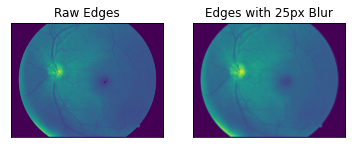

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Read in image
imgRaw = cv2.imread('/content/drive/MyDrive/retinopathy-dataset/nosymptoms/10265_left.jpeg',0)

# Blur image
blurSize = 25
blurredImg = cv2.blur(imgRaw,(blurSize,blurSize))

# Convert to Binary
thrImgRaw, binImgRaw = cv2.threshold(imgRaw, 0, 255, cv2.THRESH_OTSU)
thrImgBlur, binImgBlur = cv2.threshold(blurredImg, 0, 255, cv2.THRESH_OTSU)

# Detect the contours in the image
contoursRaw = cv2.findContours(binImgRaw,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
contoursBlur = cv2.findContours(binImgBlur,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

# Draw all the contours
contourImgOverRaw = cv2.drawContours(imgRaw, contoursRaw[0], -1, (0,255,0),5)
contourImgOverBlur = cv2.drawContours(blurredImg, contoursBlur[0], -1, (0,255,0),5)

# Plotting
plt.figure()
plt.subplot(121)
plt.imshow(contourImgOverRaw)
plt.title('Raw Edges'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(contourImgOverBlur)
plt.title('Edges with {}px Blur'.format(blurSize)), plt.xticks([]), plt.yticks([])
plt.show()

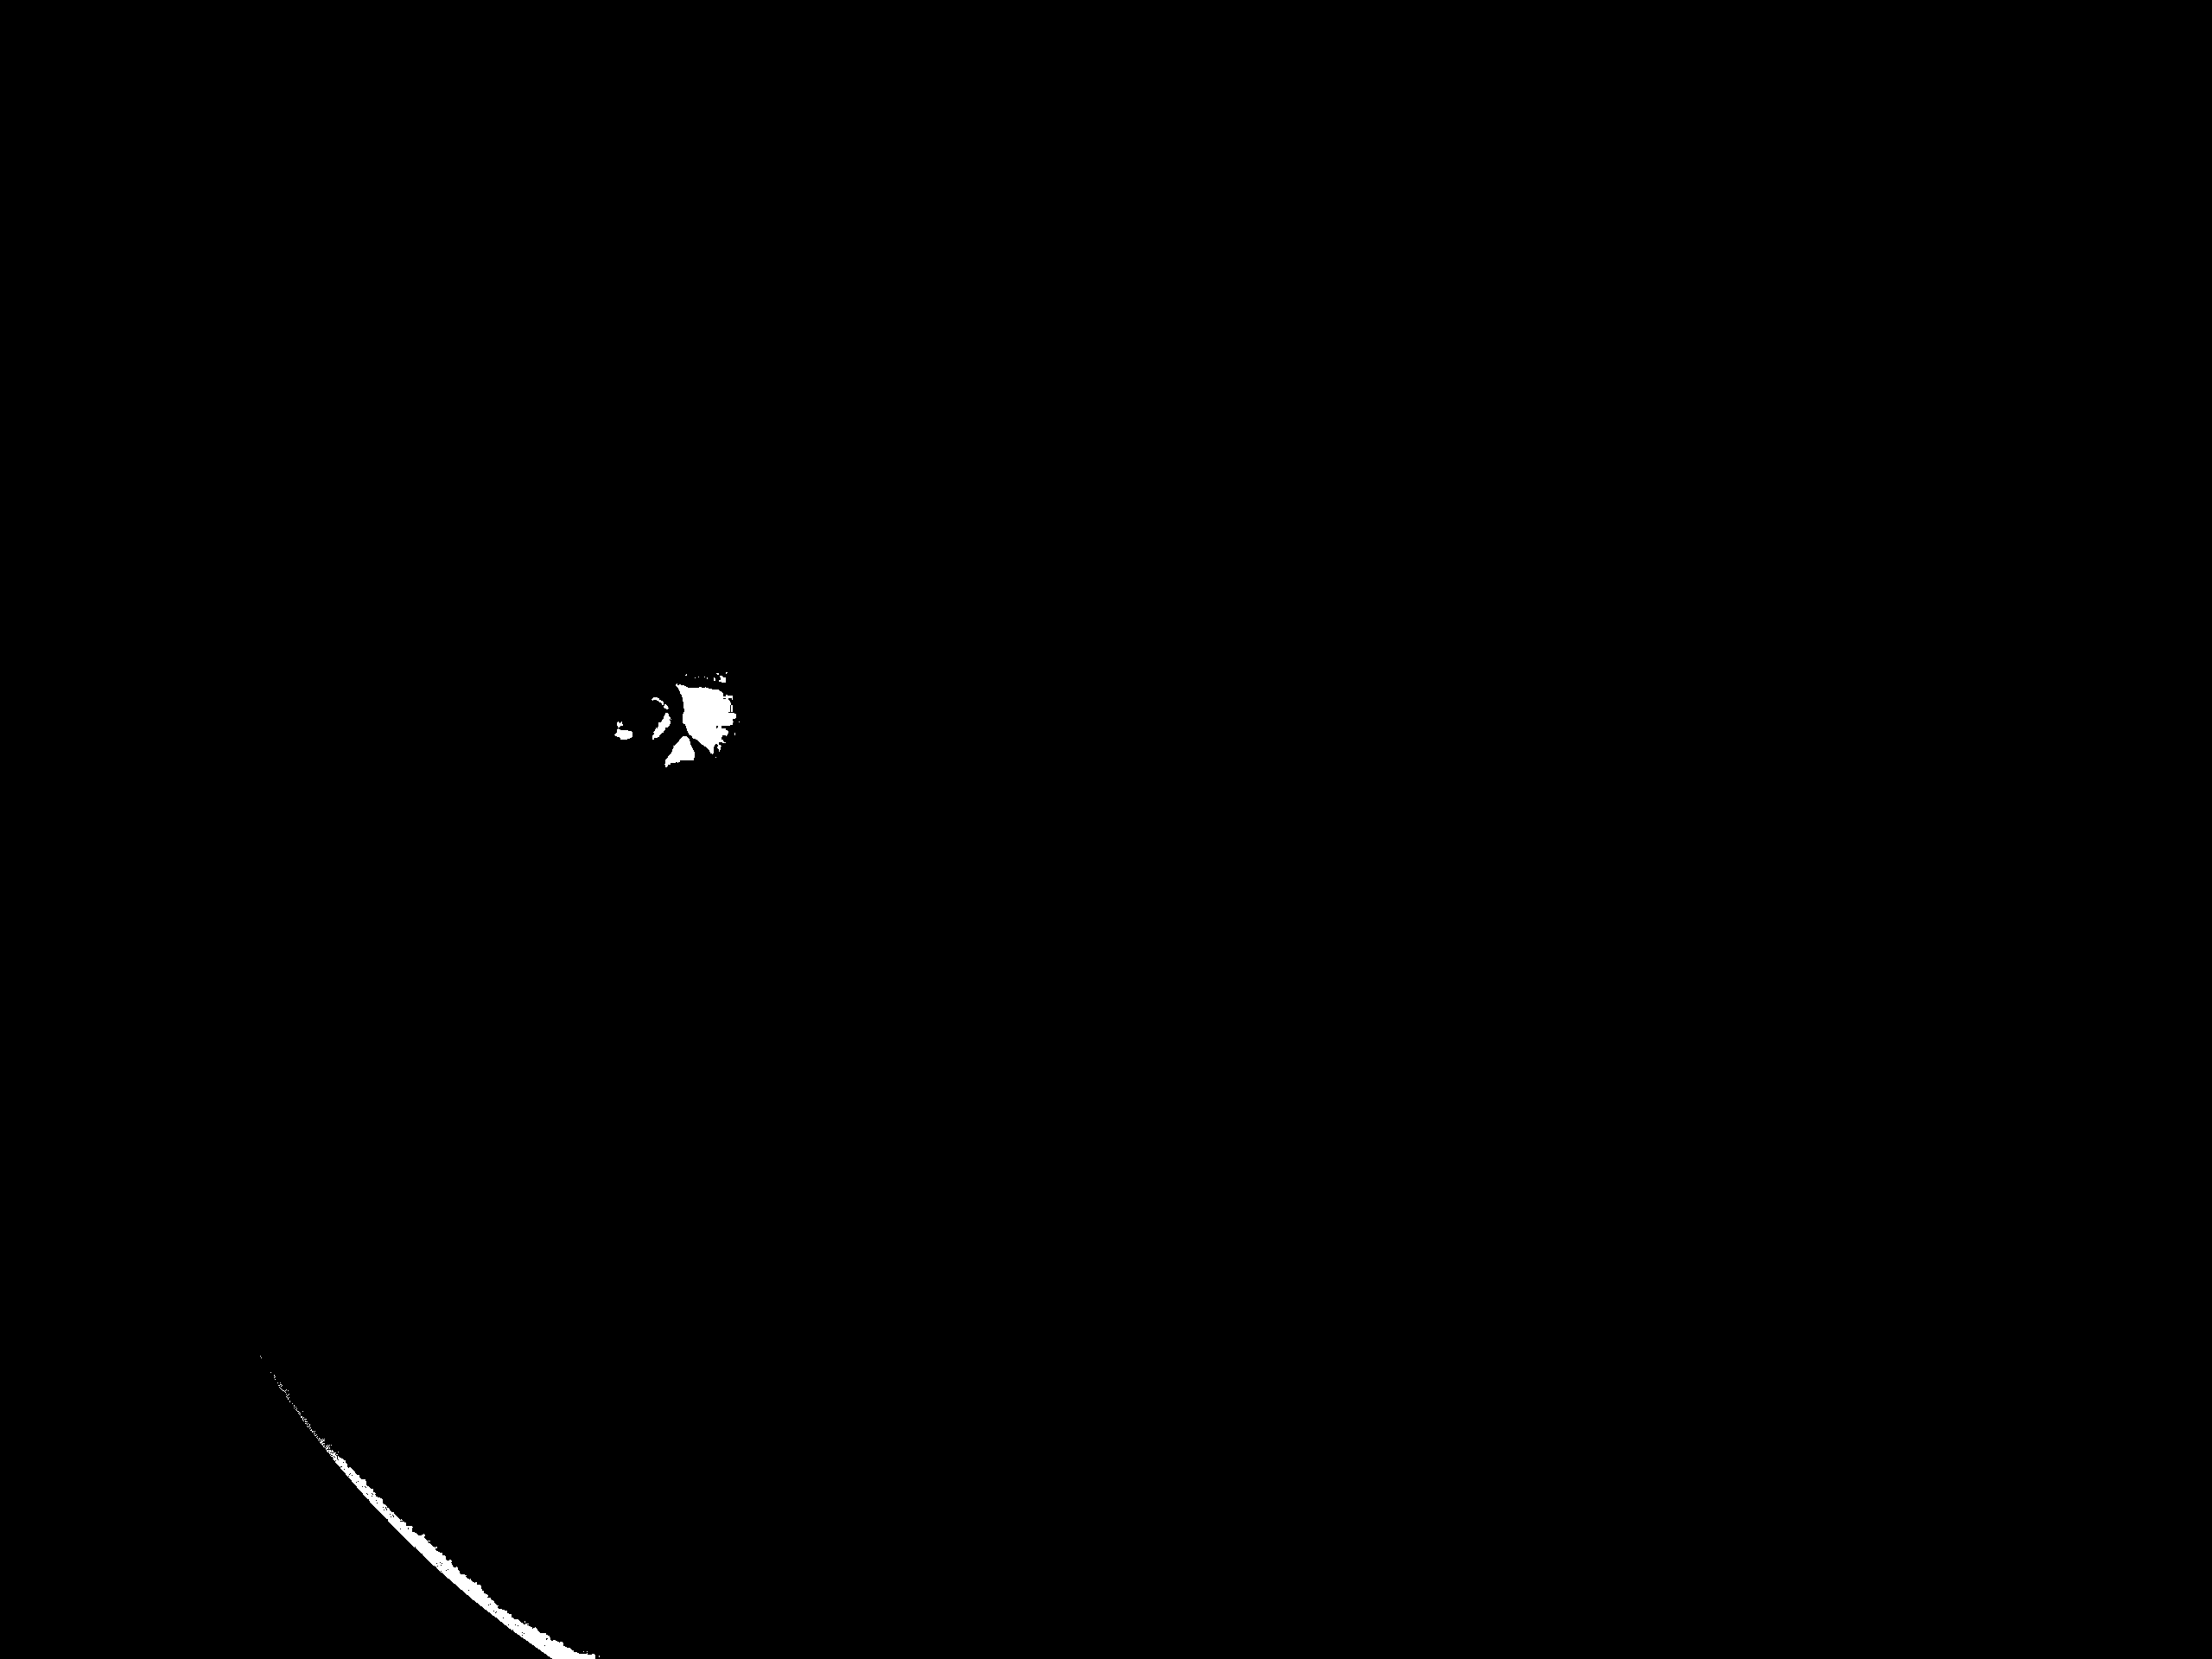

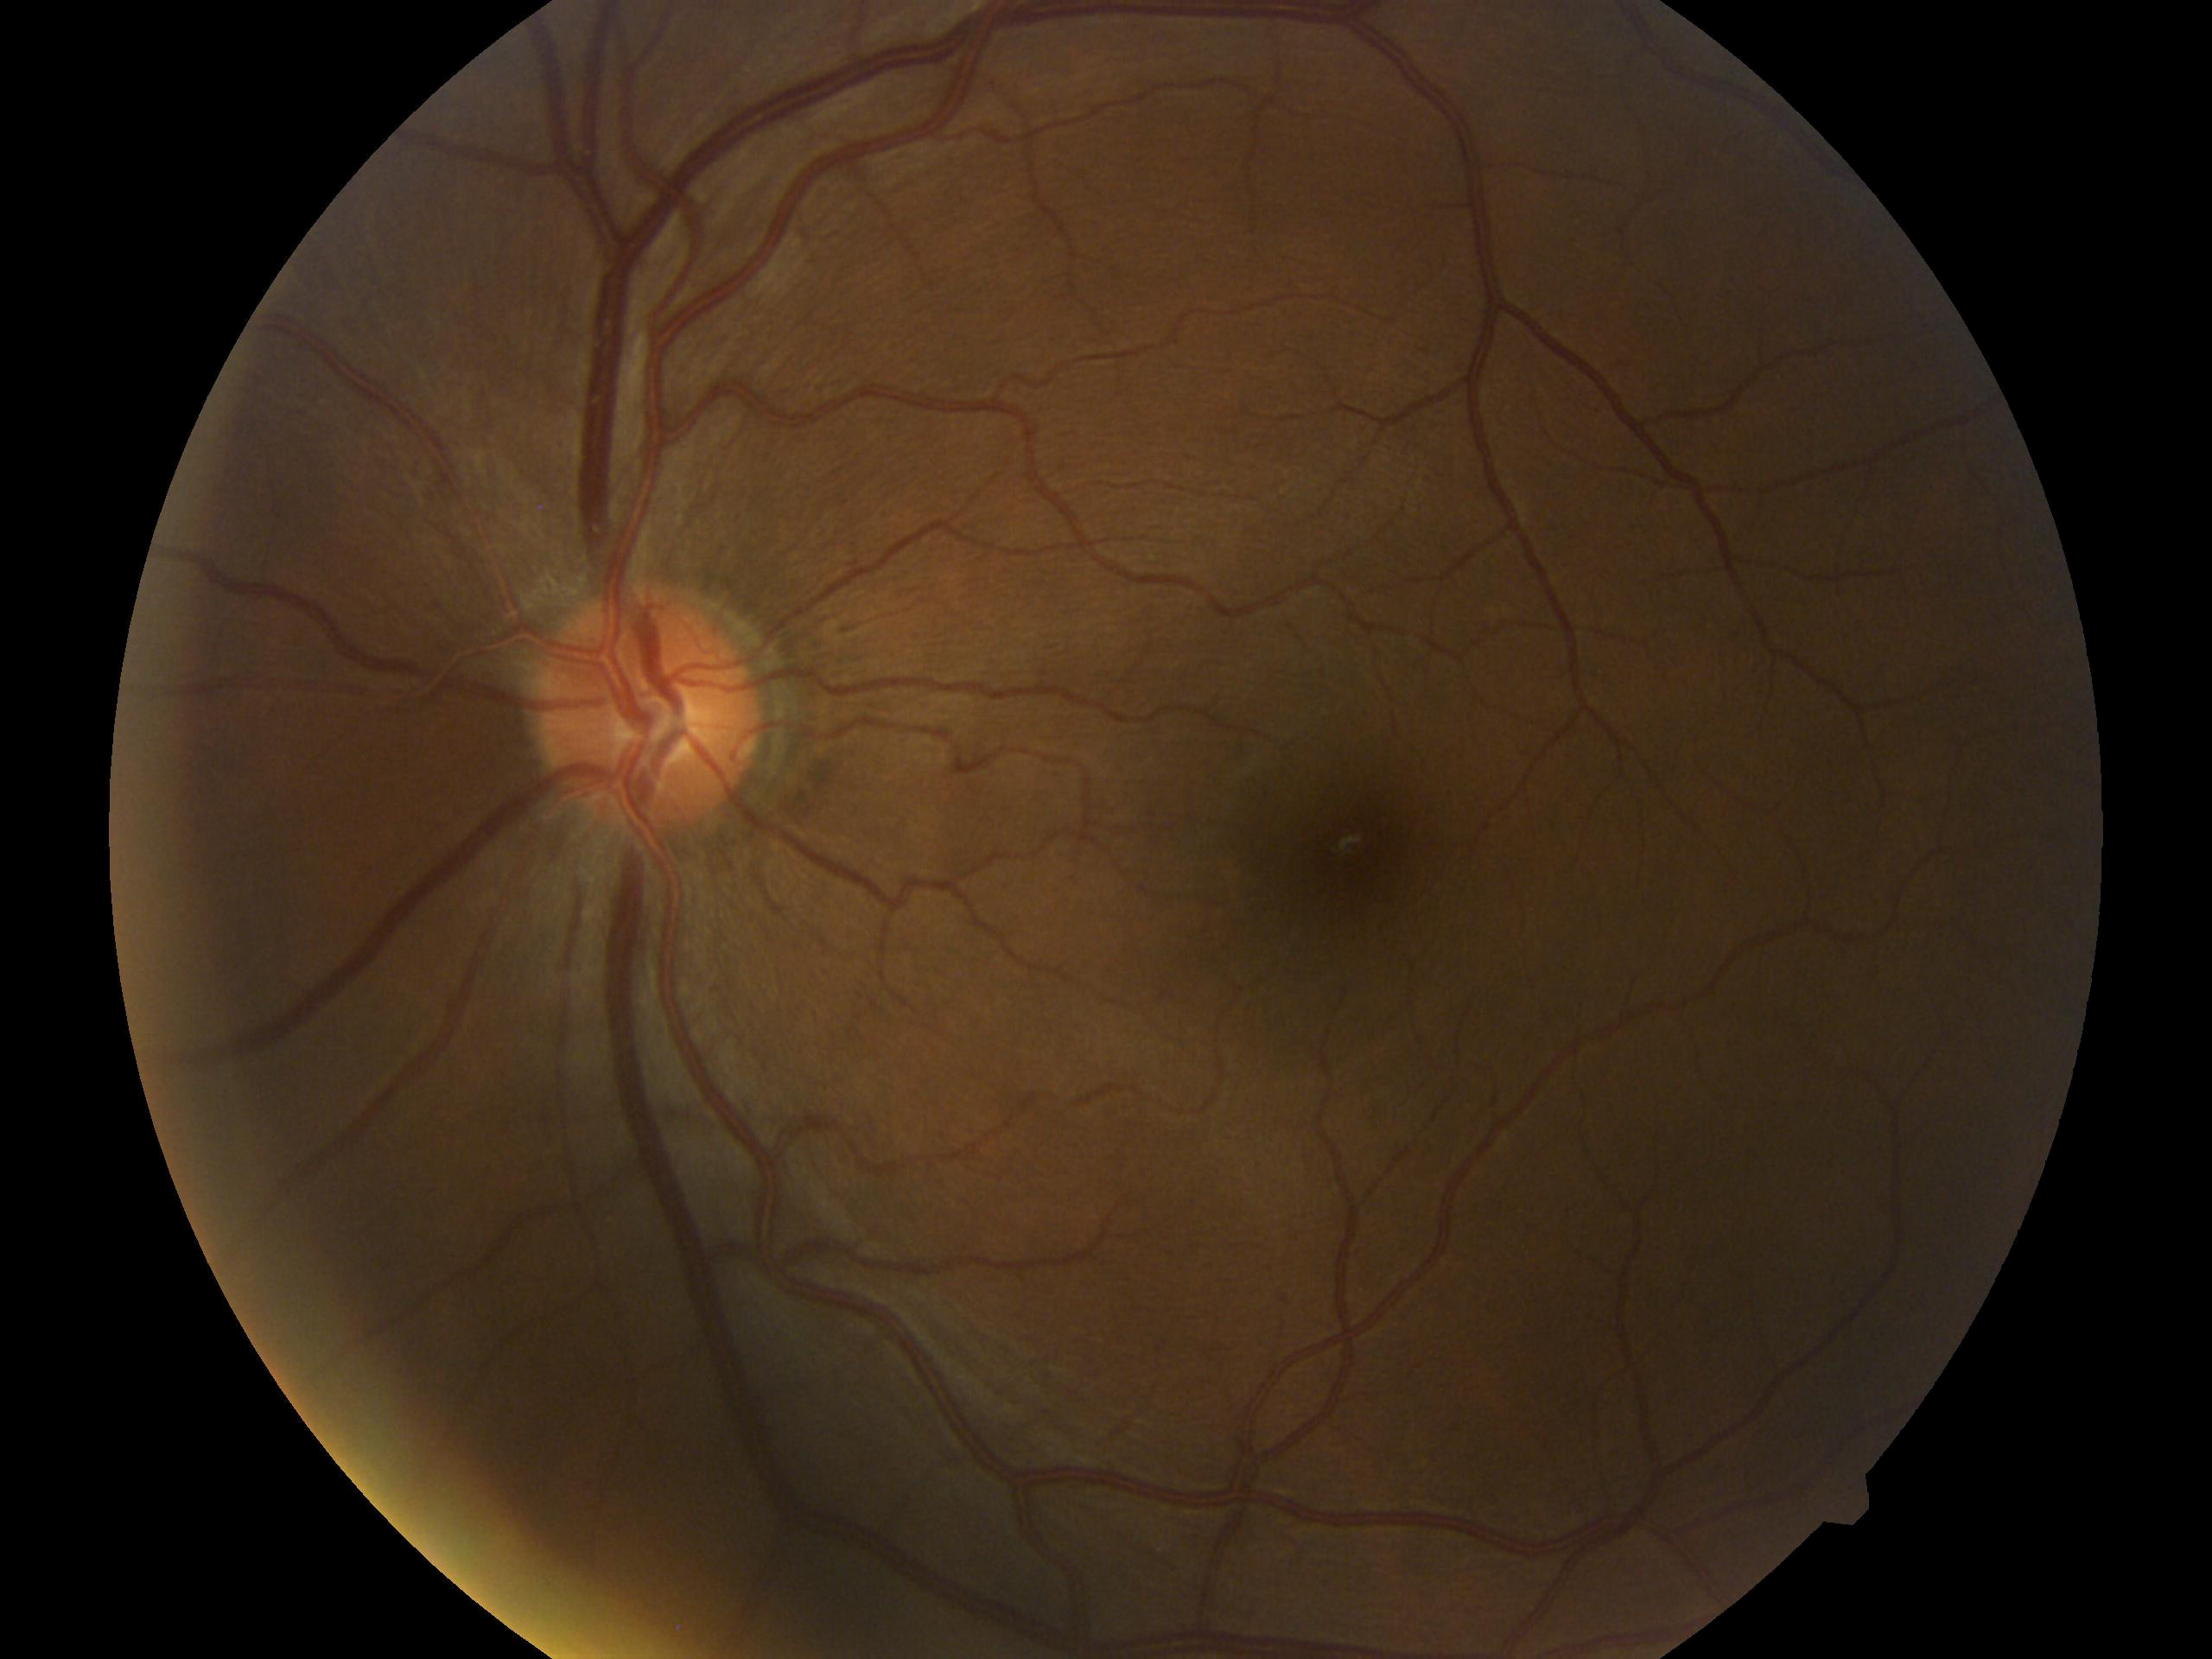

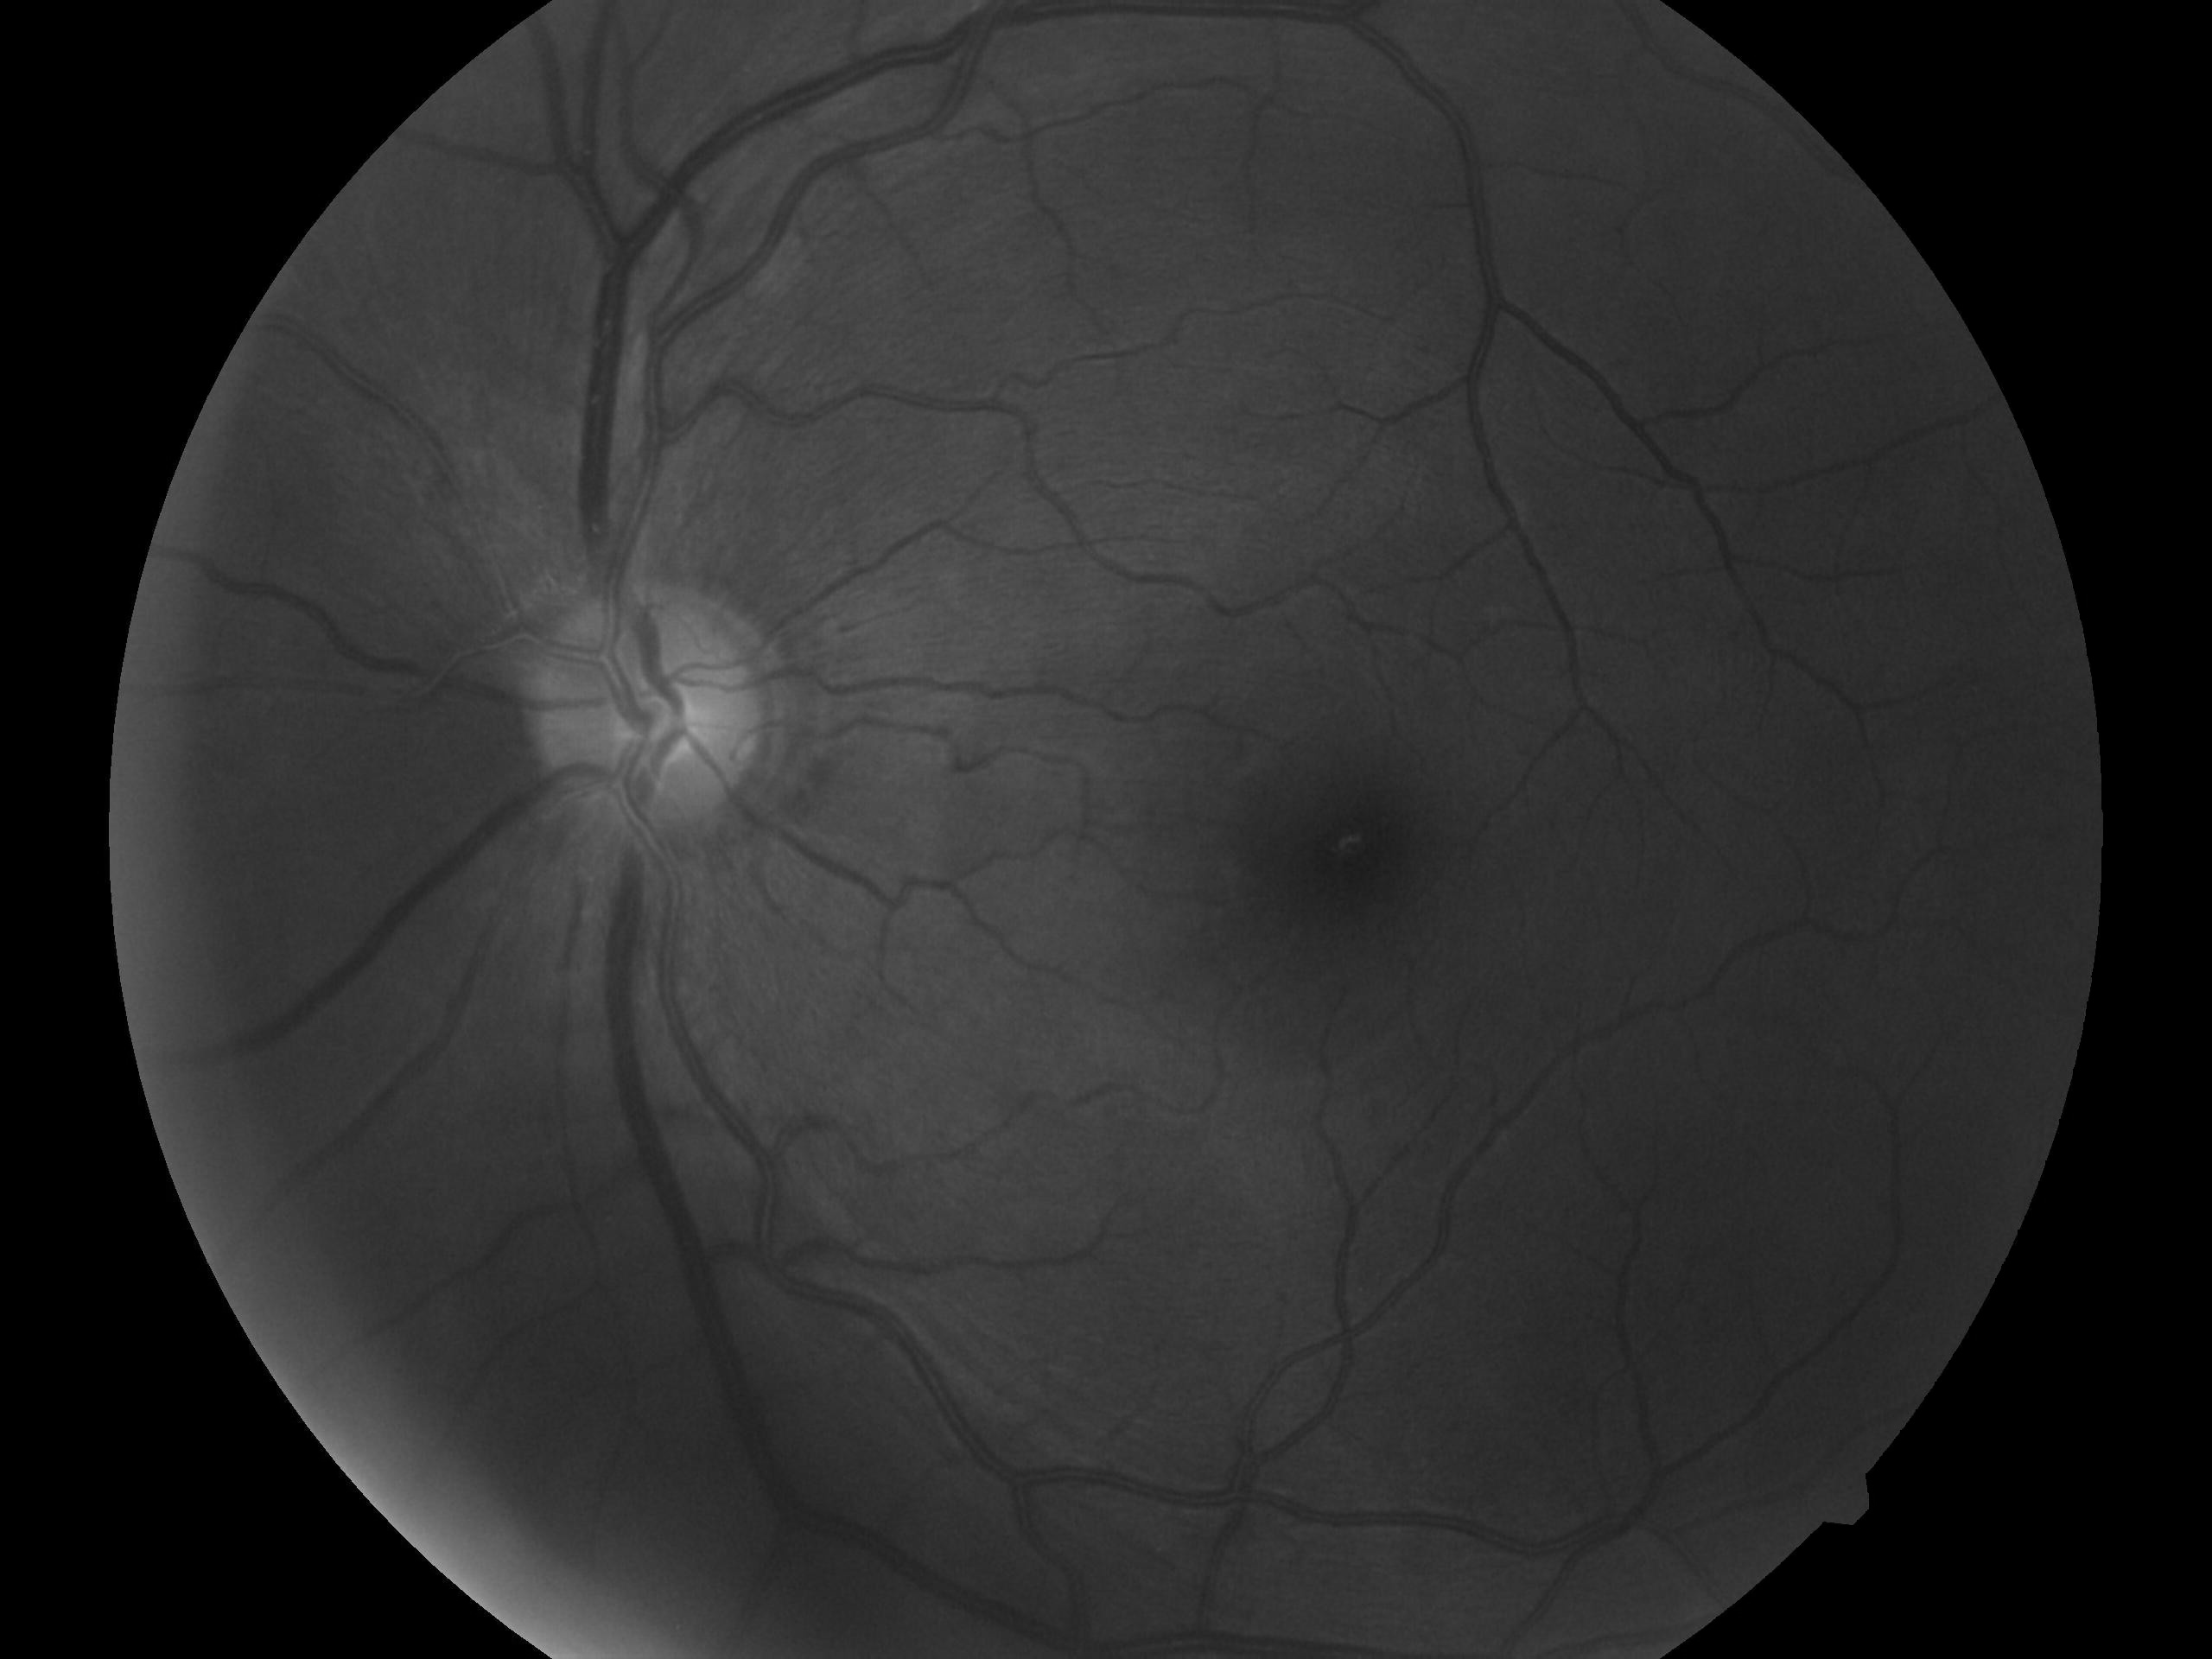

In [ ]:
#!pip install opencv-python
import cv2
from google.colab.patches import cv2_imshow

originalImage = cv2.imread('/content/drive/MyDrive/retinopathy-dataset/nosymptoms/10265_left.jpeg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)
cv2_imshow( blackAndWhiteImage)
cv2_imshow(originalImage)cv2_imshow( grayImage)

In [ ]:
# load and evaluate a saved model
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
# load model
model = load_model('/content/drive/MyDrive//model/test.h5')
# summarize model.
#model.summary()
# load dataset
Image_test='/content/drive/MyDrive/retinopathy-dataset/nosymptoms/10265_left.jpeg'
image1 = image.load_img(Image_test, target_size=(150, 150))
#image1
input_arr = image.img_to_array(image1)
input_arr = np.array([input_arr])  # Convert single image to a batch.
input_arr
predictions1 = model.predict(input_arr)
print(predictions1)
probabilities1 = model.predict_proba(input_arr)
print(probabilities1)

Image_test='/content/drive/MyDrive/retinopathy-dataset/nosymptoms/10643_left.jpeg'
image2 = image.load_img(Image_test, target_size=(150, 150))
#image1
input_arr = image.img_to_array(image2)
input_arr = np.array([input_arr])  # Convert single image to a batch.
#input_arr
predictions2 = model.predict(input_arr)
print(predictions2)
probabilities2 = model.predict_proba(input_arr)
print(probabilities2)

Image_test='/content/drive/MyDrive/retinopathy-dataset/symptoms/10030_left.jpeg'
image3 = image.load_img(Image_test, target_size=(150, 150))
#image1
input_arr = image.img_to_array(image3)
input_arr = np.array([input_arr])  # Convert single image to a batch.
#input_arr
predictions3 = model.predict(input_arr)
print(predictions3)
probabilities3 = model.predict_proba(input_arr)
print(probabilities3)

Image_test='/content/drive/MyDrive/retinopathy-dataset/symptoms/10030_right.jpeg'
image4 = image.load_img(Image_test, target_size=(150, 150))
#image1
input_arr = image.img_to_array(image4)
input_arr = np.array([input_arr])  # Convert single image to a batch.
#input_arr
predictions4 = model.predict(input_arr)
print(predictions4)
probabilities4 = model.predict(input_arr)
print(probabilities4)

predictionsclasses=['nosymptoms','symptoms']
probabilitiestest=list(probabilities3)
testprob = max(probabilitiestest)
print(testprob.tolist())
max_value = max(testprob)
print(max_value)
for i in range(len( testprob)):
  if testprob[i] == max_value:
    max_index =i
print(predictionsclasses[max_index])